In [49]:
import numpy as np
from matplot.pyplot import as plt

from sympy import *
init_session()

from sympy.plotting import plot, plot_implicit, plot3d
%matplotlib inline

SyntaxError: invalid syntax (2301617383.py, line 2)

## Linear Function

Consider the function

$$
2x + 3y(x) = 0
$$

Differentiate both sides yields $2 + 3' = 0 \rightarrow y' = -2/3$.

In [3]:
f1 = Eq(2*x + 3*y, 10)

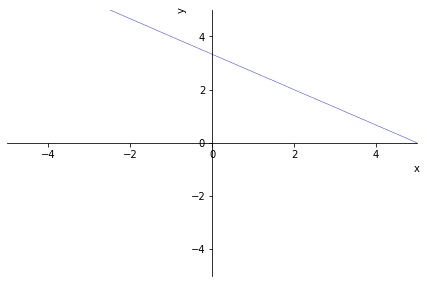

In [4]:
plot_implicit(f1)

## More complex Example

Now consider

$$
xy = 4
$$

Differentiating yields $y + xy' = 0 \rightarrow y' = -y/x$. From the function definition we obtain $y = 4/x$ and can insert this into $y'$. We finally obtain

$$
y'= -4/x^2
$$

Of course, we could have expressed $y$ from the function definition right away ($y = 4/x$) and differentiated this function without additional ceremony.

In [6]:
f2 = Eq(x*y, 4)

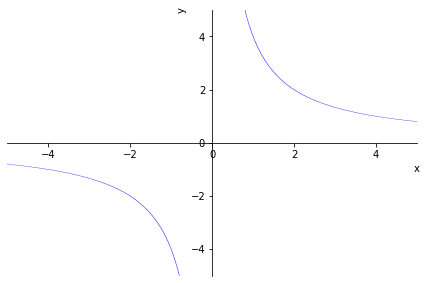

In [7]:
plot_implicit(f2)

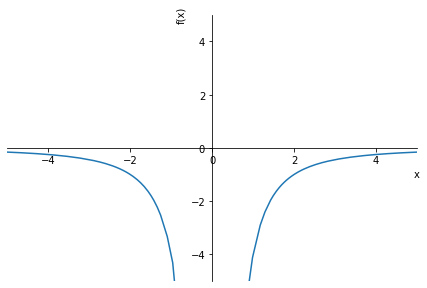

In [9]:
plot(-4/x**2, xlim=(-5,5), ylim=(-5,5))

## Even more complex :-)

So far, we somehow have been able to express the derivative as function of $x$. Now we consider an example, where this is no longer the case. We take

$$
y^2 + xy - x^2 = 4
$$

and differentiate it implicitely (see Journal entry "Differentiation of Implicit Functions", 2018-06-08),

$$
2yy' + y + xy' - 2x = 0
$$

We can express the derivative explicitely (note that even this may not be possible in all cases),

$$
y' = \frac{2x-y}{2y+x}
$$

But from here on it gets difficult as we cannot find a closed-form expression for $y$ (at least not a simple). Let's plot the function first.

In [14]:
f3 = Eq(y**2 + x*y - x**2,4)

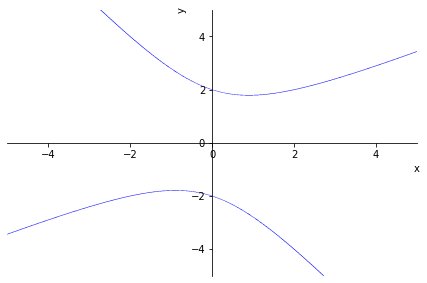

In [17]:
plot_implicit(f3)

A simple task is to ask for zeros of the derivative, $y' = 0 \rightarrow 2x-y = 0 \rightarrow y = 2x$ and insert back into the function equation, $4x^2 + 2x^2 - x^2 = 4 \rightarrow x = \pm 2/\sqrt{5}$.

In [19]:
2/sqrt(5).evalf()

What happens at $x = 0$? We have $y^2 = 4 \rightarrow y = \pm 2$.

What would be interesting to know is how the curve behaves for large $x$... The problem is that we cannot take the limit $x \rightarrow \infty$ and see what happens with $y$ as we do not have a closed-form expression for $y$. Instead, we need an educated guess about the relation between $x$ and $y$, insert it into the implicit function definition and see what happens...

We make the following Ansatz

$$
y = kx
$$

and insert this into the implicit function definition,

$$
k^2 x^2 + k x^2 - x^2 = 4
$$

which becomes $(k^2 + k - 1) x^2 = 4$. I would expect some expression which can be fulfilled for *any* value of $x$ but this is not the case... Maybe the Ansatz is wrong?

In [39]:
s = solve(f3.subs(x,1000))
s[0].evalf()

If we plot the value of $x$ vs $y$, we see a linear relation between the two...

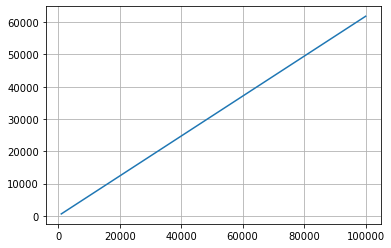

In [55]:
xval = np.linspace(1000,100000, 20)
temp = [solve(f3.subs(x, xv)) for xv in xval]
yval = [y[1] for y in temp]
plt.plot(xval, yval)
plt.grid(True)

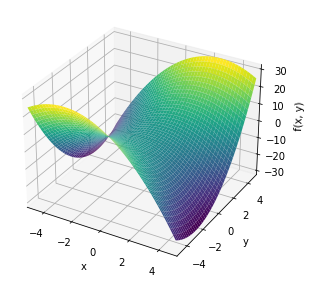

In [27]:
plot3d(y**2 + x*y - x**2, (x,-5,5), (y,-5,5))